<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_DPI_analysis/blob/main/America_do_Norte_e_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando e manipulando os dados

In [1]:
library(tidyverse)
library(readr)

# Importando os dados
data <- read_csv("DPI2020.csv")

# Definido o escopo da análise: filtrando os países e o período
df1 <- data %>%
  arrange(countryname)
  
df1 <- df1[, c('countryname','execnat', 'system', 'yrsoffc',
             'finittrm','execrlc','execrel', 'reelect', 
             'year', 'termlimit')] %>%
  rename('Anos de governo' = 'yrsoffc',
         'Religião' = 'execrel',
         'Ideologia' = 'execrlc',
         'Reeleição' = 'reelect',
         'País' = 'countryname',
         'Ano' = 'year',
         'Mandato finito' = 'finittrm',
         'Regime' = 'system',
         'Nacionalista' = 'execnat',
         'Restrições à reeleição' = 'termlimit') %>%
  dplyr :: na_if(-999) %>%
  dplyr :: na_if('')

# Definindo as variáveis categóricas  e atribuindo nomes às categorias
df1$Regime <- factor(df1$Regime,
                    levels = c('Presidential',
                               'Assembly-Elected President',
                               'Parliamentary'),
                    labels = c('Presedencialismo',
                               'Presidente eleito pelo parlamento',
                               'Parlamentarismo'))

df1$`Mandato finito` <- factor(df1$`Mandato finito`,
                              levels = c(0, 1),
                              labels = c('Não', 'Sim'))

df1$Reeleição <- factor(df1$Reeleição,
                       levels = c(0,1),
                       labels = c('Não', 'Sim'))

df1$Ideologia <- factor(df1$Ideologia,
                       levels = c(0,
                                  'Right',
                                  'Center',
                                  'Left'),
                       labels = c('Sem informação',
                                  'Direita',
                                  'Centro',
                                  'Esquerda'))
df1$Religião <- factor(df1$Religião,
                      levels = c(0,
                                 'Christian',
                                 'Catholic',
                                 'Islamic',
                                 'Hindu'),
                      labels = c('Outro',
                                 'Cristão',
                                 'Católico',
                                 'Islã',
                                 'Hindu'))
df1$Nacionalista <- factor(df1$Nacionalista,
                          levels = c(0,1),
                          labels = c('Não', 'Sim'))

df1$`Restrições à reeleição` <- factor(df1$`Restrições à reeleição`,
                                      levels = c(1,2,3,4,5,6,7,8),
                                      labels = c('Sem limitações',
                                                 'limitação a mandatos consecutivos',
                                                 'Até dois mandatos não consecutivos',
                                                 'Até dois mandatos consecutivos',
                                                 'Proibido se reeleger',
                                                 'Até 3 mandatos consecutivos',
                                                 'Reeleição possível se ficar 2 mandatos fora',
                                                 'Até dois mandatos'))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 8200 Columns: 129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (26): countryname, ifs, system, execme, execrlc, execrel, nonchief, gov...
dbl (103): year, yrsoffc, finittrm, yrcurnt, termlimit, reelect, multpl, mil...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Definindo o subset

In [2]:
install.packages(c('psych', 'cowplot', 'corrplot'))
library(ggplot2)
library(psych)
library(cowplot)
library(corrplot)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


corrplot 0.92 loaded



In [3]:
cores_cat <- c('#3498db', '#2ecc71', '#f1c40f',
               '#d35400', '#797d7f', '#17202a',
               '#e74c3c', '#9b59b6')
cores_rgb <-  c('red', 'blue', 'gold')

In [4]:
df_AmericaCentraleNorte <- df1 %>%
  filter(País %in% c("Bahamas", "Barbados", "Belize",
                     "Canada", "Costa Rica", "Cuba",
                     "Dom. Rep.", "El Salvador", "Grenada",
                     "Guatemala", "Haiti", "Honduras",
                     "Jamaica", "Mexico", "Nicaragua",
                     "Panama", "Trinidad-Tobago", "USA", "St. Lucia" ))

## Plots

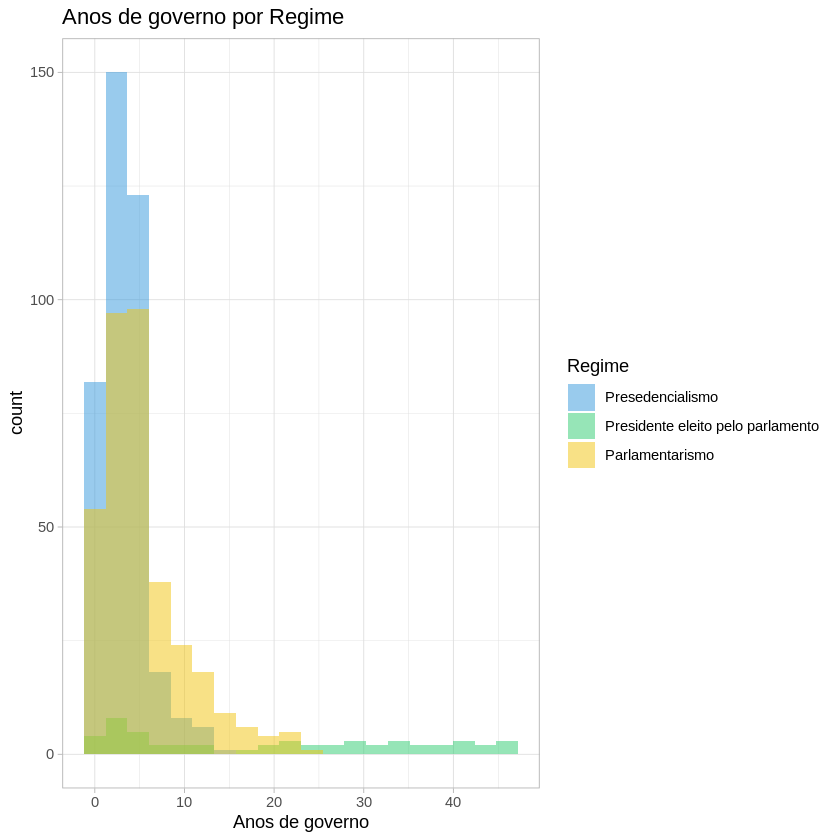

In [5]:
df_amn1 <- na.omit(df_AmericaCentraleNorte)

ggplot(df_amn1)+
  aes(`Anos de governo`, fill = Regime)+ 
  geom_histogram(bins = 20, position = 'identity', alpha = 0.5)+
  theme_light()+
  scale_fill_manual(values = cores_cat) +
  labs(title = 'Anos de governo por Regime')

A maior parte é presidencialista, seguida por parlamentarismo. Os regimes presidencialistas com parlamento foram mais longos 

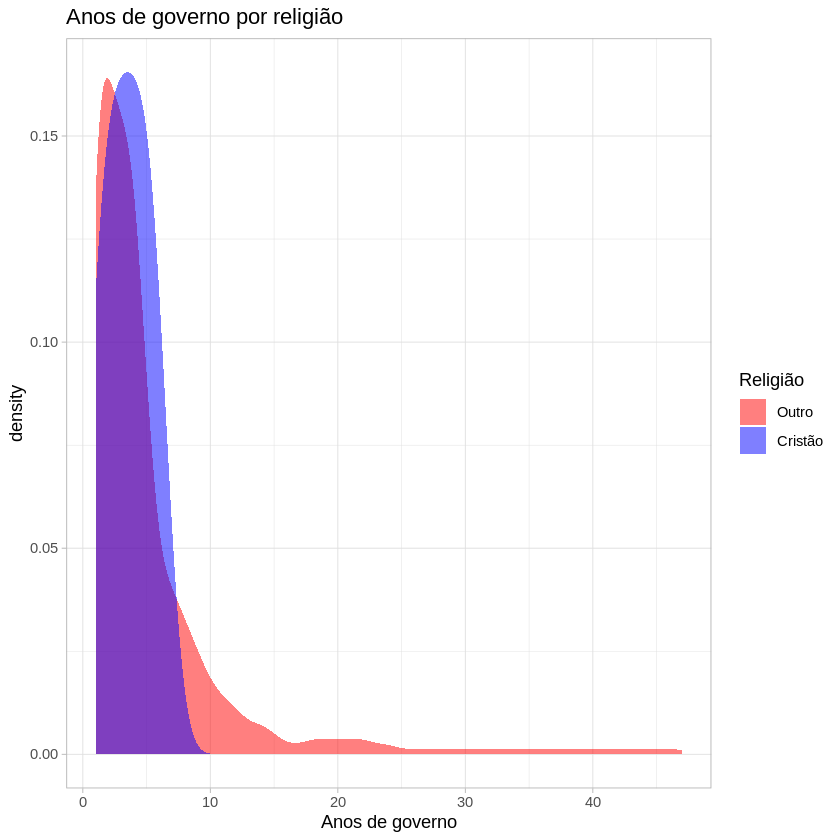

In [6]:
ggplot(df_amn1)+
  aes(`Anos de governo`, fill = Religião)+ 
  geom_density(position = 'identity', alpha = 0.5, color = NA)+
  theme_light()+ 
  scale_fill_manual(values = cores_rgb) +
  labs( title = 'Anos de governo por religião')

Houveram somente governos declaradamente religiosos que fossem cristãos na america do norte e central.

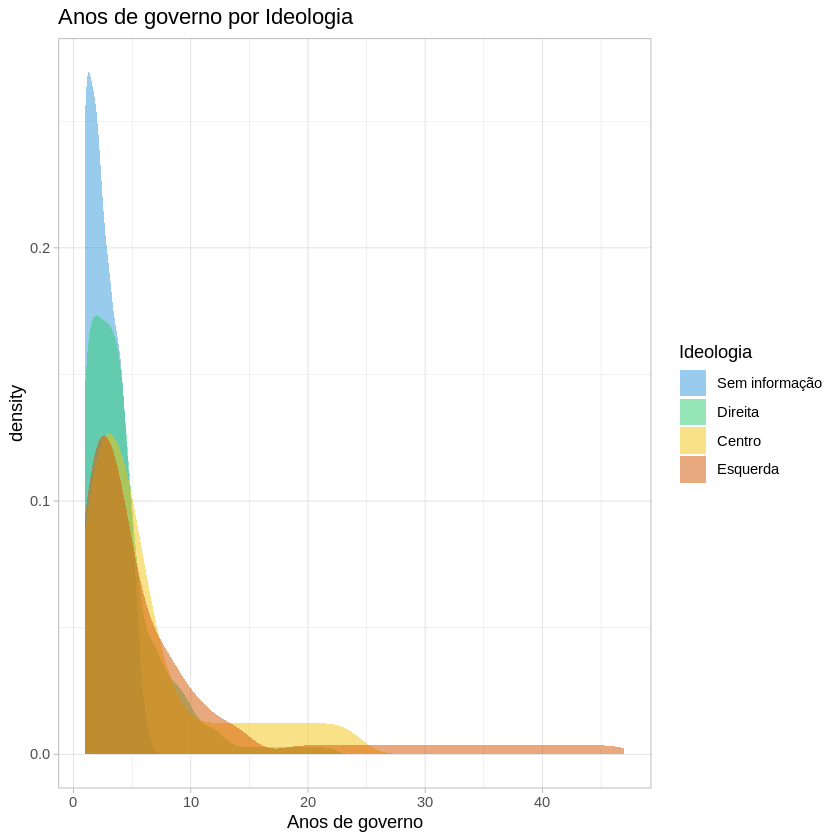

In [7]:
ggplot(df_amn1)+
  aes(`Anos de governo`, fill = Ideologia)+ 
  geom_density(position = 'identity', alpha = 0.5, color = NA)+
  theme_light()+
  scale_fill_manual(values = cores_cat) +
  labs(title = 'Anos de governo por Ideologia')

Houveram mais governos de direita que duraram pouco. Também houveram mais governos de centro. O governo mais longevo era de esquerda e se estende por todo o período da amostra.


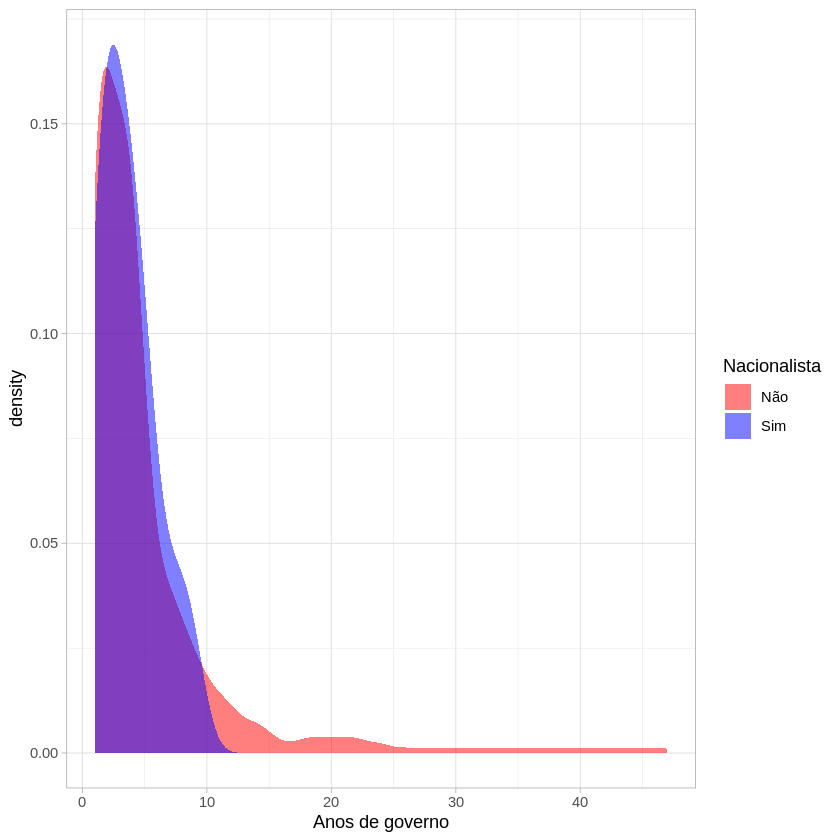

In [8]:
ggplot(df_amn1)+
  aes(`Anos de governo`, fill = Nacionalista)+ 
  geom_density(position = 'identity', alpha = 0.5, color = NA)+
  theme_light()+ 
  scale_fill_manual(values = cores_rgb) +
  labs('Anos de governo de regimes nacionalistas')

Os governos não nacionalistas duraram mais tempo. Há uma concentração de governos nacionalistas que duraram até 10 anos

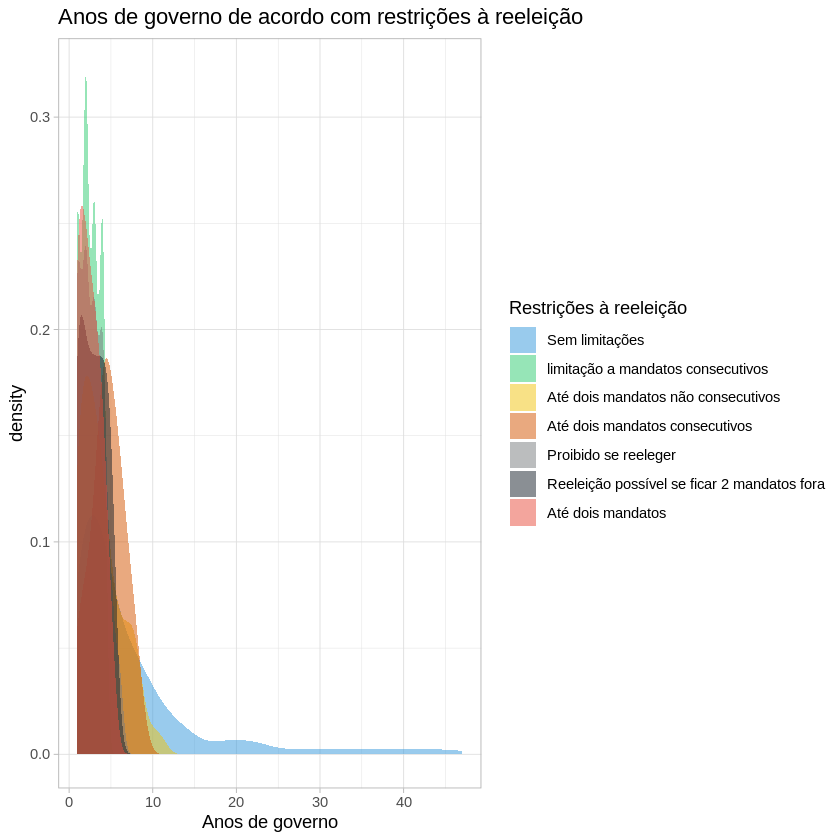

In [10]:
ggplot(df_amn1)+
  aes(`Anos de governo`, fill = `Restrições à reeleição`)+ 
  geom_density(position = 'identity', alpha = 0.5, color = NA)+
  theme_light()+
  scale_fill_manual(values = cores_cat) +
  labs(title = 'Anos de governo de acordo com restrições à reeleição')

Hoveram alguns mandatos sem limitação que duraram 4 décadas. Há indicios para acreditar que os governos seguem as constituições e não estendem além do permitido, salvo uma exceção.


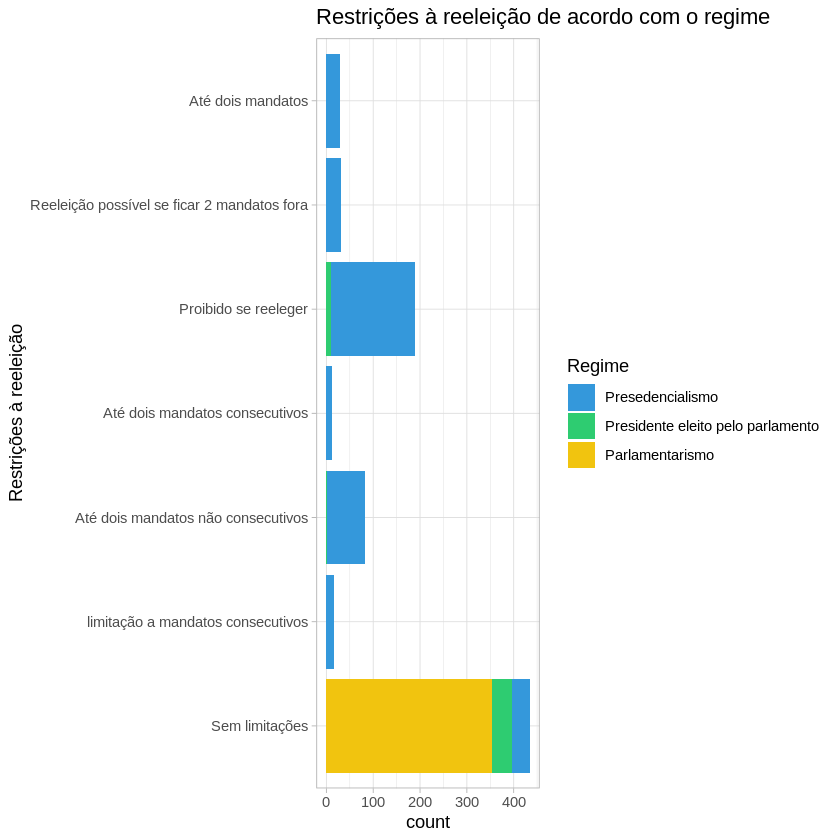

In [11]:
# Criando um gráfico de barras para variáveis categóricias
ggplot(df_amn1) + 
  aes(`Restrições à reeleição`, fill = Regime) + 
  geom_bar() + 
  theme_light() +
  scale_fill_manual(values = cores_cat)+
  coord_flip() +
  labs(title = 'Restrições à reeleição de acordo com o regime')

Os regimes parlamentaristas ocorreram em países sem restrições a reeleição

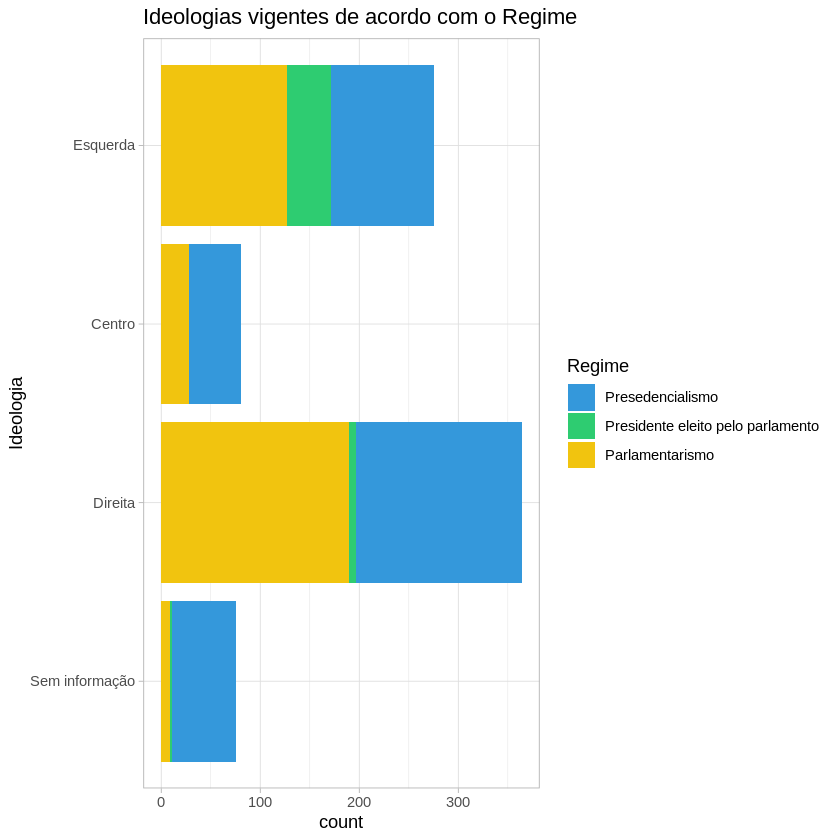

In [12]:
ggplot(df_amn1) + 
  aes(Ideologia, fill = Regime) + 
  geom_bar() + 
  theme_light() +
  scale_fill_manual(values = cores_cat)+
  coord_flip() +
  labs(title = 'Ideologias vigentes de acordo com o Regime')

As unicas experiencias presidencialistas com parlamento foram de esquerda.

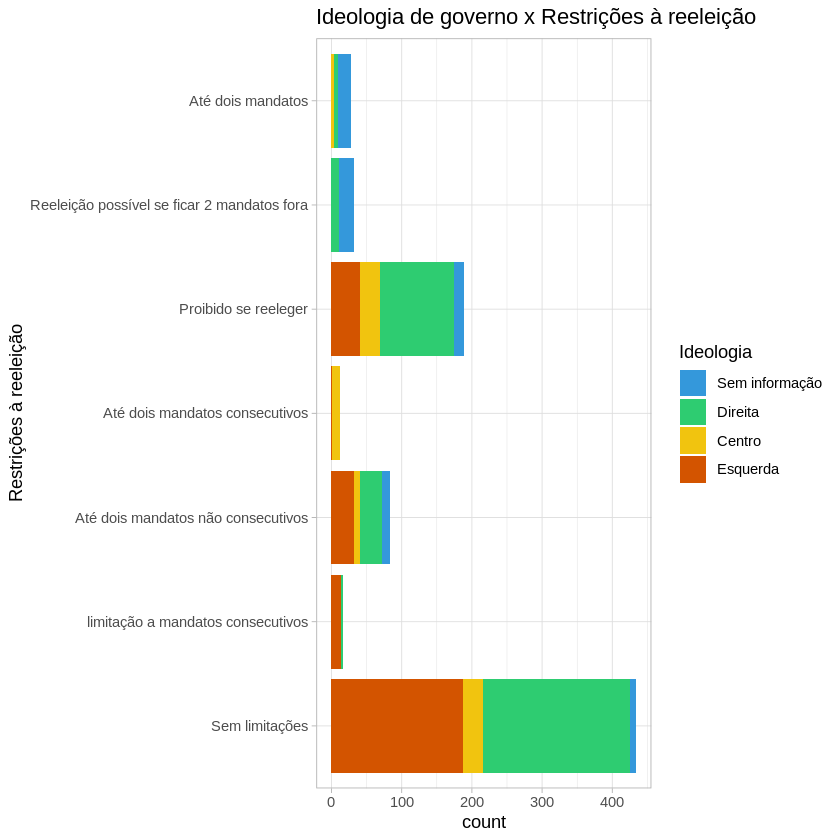

In [14]:
ggplot(df_amn1) + 
  aes(`Restrições à reeleição`, fill = Ideologia) + 
  geom_bar() + 
  theme_light() +
  scale_fill_manual(values = cores_cat)+
  coord_flip() +
  labs(title = 'Ideologia de governo x Restrições à reeleição')

A maior parte dos regimes sem limtação de reeleição eram de esquerda ou de direita.

$title
[1] "Regimes de acordo com o regime, nacionalismo, restrições a reeleição e ideologia"

attr(,"class")
[1] "labels"

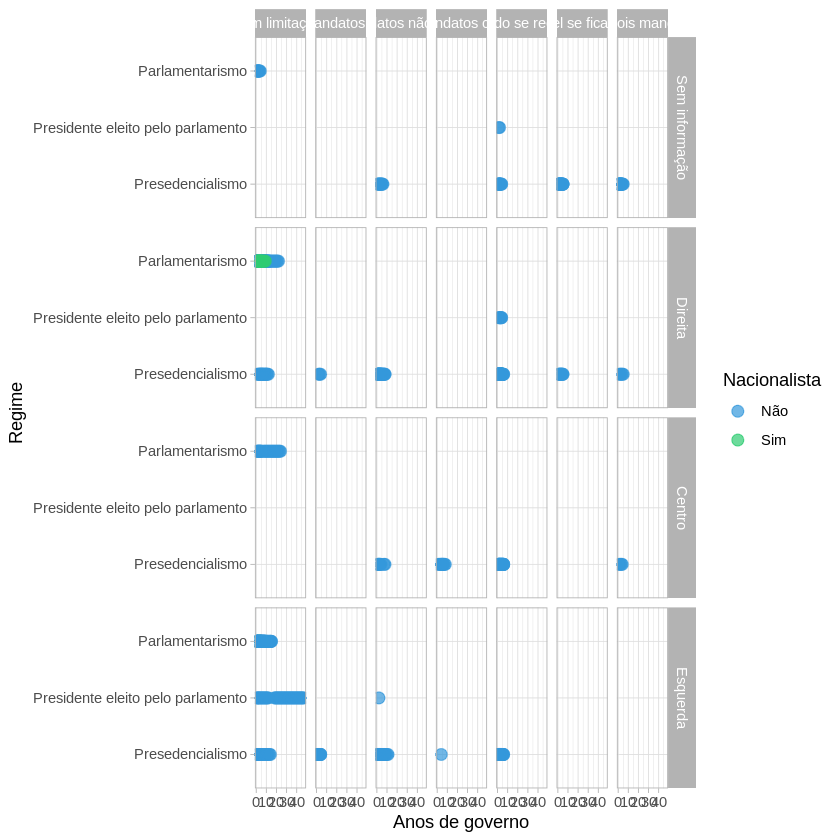

In [16]:
# Análise multifacetada
ggplot(df_amn1) +
  aes(x = `Anos de governo`, y = Regime , color = Nacionalista) +
  geom_point(alpha = 0.7, size = 3) +
  theme_light() +
  scale_color_manual(values = cores_cat) +
  facet_grid(Ideologia ~ `Restrições à reeleição`) 
  labs(title = 'Regimes de acordo com o regime, nacionalismo, restrições a reeleição e ideologia')

Os unicos regimes parlamentaristas e nacionalistas foram de direita.